In [1]:
import pandas as pd 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import StandardSCaler
import math 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

ImportError: cannot import name 'StandardSCaler' from 'sklearn' (/Users/georgeangel/anaconda3/lib/python3.11/site-packages/sklearn/__init__.py)

In [65]:

# data = pd.read_csv('../data/CCFC_match_lineups_data.csv')
data = pd.read_csv('CCFC_match_lineups_data.csv')
data.head()
list(data.columns.values)

['Unnamed: 0',
 'Opposition',
 'Distance',
 'HSR',
 'Sprint',
 'Accelerations',
 'Decelerations',
 'Jumps',
 'match_id',
 'season_name',
 'team',
 'opposition_team',
 'goals_scored',
 'goals_conceded',
 'np_xg',
 'np_xg_conceded',
 'shots',
 'shots_on_target',
 'opposition_shots',
 'opposition_shots_on_target',
 'passes',
 'opposition_passes',
 'completed_passes_into_the_box',
 'pressures',
 'pressure_regains',
 'fouls',
 'tackles',
 'yellow_cards',
 'xg_within_8_seconds_of_corner',
 'xg_conceded_within_8_seconds_of_corner',
 'shots_within_8_seconds_of_corner',
 'shots_conceded_within_8_seconds_of_corner',
 'goals_within_8_seconds_of_corner',
 'goals_conceded_within_8_seconds_of_corner',
 'xg_within_8_seconds_of_indirect_free_kick',
 'xg_conceded_within_8_seconds_of_indirect_free_kick',
 'shots_within_8_seconds_of_indirect_free_kick',
 'shots_conceded_within_8_seconds_of_indirect_free_kick',
 'goals_within_8_seconds_of_indirect_free_kick',
 'goals_conceded_within_8_seconds_of_indirect_

In [ ]:
def preprocess_data(df):
    original_shape = df.shape
    df_cleaned = df.copy()
    df_cleaned = df_cleaned.dropna(how='any') # drop empty columns

    numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
    scaler = StandardScaler()
    df_cleaned[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])

    if 'result' in df_cleaned.columns:
        df_cleaned['result'] = (df_cleaned['result'] == 'win').astype(int)

    return df_cleaned

In [66]:
preprocess_data(data.dropna(how='all')

,Unnamed: 0,Opposition,Distance,HSR,Sprint,Accelerations,Decelerations,Jumps,match_id,season_name,...,final_third_possession,ppda,completed_passes_and_carries_into_final_third,match_outcome,date,monte_carlo_win_prob,monte_carlo_draw_prob,monte_carlo_loss_prob,location,lineup
0,0,MK Dons,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,NaN,NaN,NaN,NaN,2020-09-05,NaN,NaN,NaN,away,[]
1,1,Bristol,110778.68,7095.44,1315.26,280.0,405.0,50.0,3764253.0,2021,...,58.0,9.285714,43.0,lost,2020-09-12,0.2878,0.2962,0.4160,away,"[{'player_id': 3355, 'squad_role': 'Starting X..."
2,2,Gillingham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021,...,NaN,NaN,NaN,NaN,2020-09-15,NaN,NaN,NaN,away,[]
3,3,QPR,111807.25,7601.80,1511.42,293.0,404.0,33.0,3764258.0,2021,...,41.0,20.833333,38.0,won,2020-09-18,0.3171,0.3402,0.3427,home,"[{'player_id': 3355, 'squad_role': 'Starting X..."
4,4,Barnsley,106883.57,7861.21,1346.77,323.0,454.0,36.0,3766905.0,2021,...,45.0,7.500000,35.0,draw,2020-09-26,0.2182,0.3205,0.4613,away,"[{'player_id': 3355, 'squad_role': 'Starting X..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,197,Manchester United,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2324,...,NaN,NaN,NaN,NaN,2024-04-21,NaN,NaN,NaN,away,[]
198,198,Hull,110919.00,7773.00,1469.00,286.0,413.0,25.0,3895799.0,2324,...,59.0,9.419355,47.0,lost,2024-04-24,0.0296,0.0947,0.8757,home,"[{'player_id': 3061, 'squad_role': 'Starting X..."
199,199,Blackburn,97988.00,6161.00,1098.00,265.0,407.0,42.0,3895882.0,2324,...,35.0,19.000000,37.0,draw,2024-04-27,0.0159,0.0806,0.9035,away,"[{'player_id': 3061, 'squad_role': 'Starting X..."
200,200,Ipswich,104052.00,6393.00,1474.00,283.0,364.0,16.0,3895872.0,2324,...,63.0,10.904762,58.0,lost,2024-04-30,0.1932,0.2693,0.5375,home,"[{'player_id': 3061, 'squad_role': 'Starting X..."


In [67]:
dist_run = "Distance" 
acc = 'Accelerations' 
shots = 'shots' 
passes = 'passes' 



np_xg = 'np_xg'
np_xg_against = 'np_xg_conceded'

# will be extended later on 
features = [ 
    acc, shots, passes, 'tackles', 'pressures', 'Sprint', 'fouls' ,'shots_on_target', 'possession' 
]



features = [ 
    'shots', 
    'shots_on_target', 
    'opposition_shots', 
    'opposition_shots_on_target', 
    'passes', 
    'opposition_passes', 
    'completed_passes_into_the_box',  
    'pressures', 
    'pressure_regains', 
    'xg_within_8_seconds_of_corner',
    'xg_concedesd_within_8_seconds_of_corner',
    'shots_within_8_seconds_of_corner',
    'shots_conceded_within_8_seconds_of_corner',
    'shots_within_8_seconds_of_indirect_free_kick',
    'shots_conceded_within_8_seconds_of_indirect_free_kick',
    'possession',
    'final_third_possession',
    'ppda',
    'completed_passes_and_carries_into_final_third'
]

outputs = [ 
    np_xg, np_xg_against
]

feature_data = data[features]
feature_data = feature_data.dropna(how='all')


output_data = data[outputs]
output_data = output_data.dropna(how='all')

print(len(output_data) == len(feature_data))
feature_data.head()

True


,shots,shots_on_target,opposition_shots,opposition_shots_on_target,passes,opposition_passes,completed_passes_into_the_box,pressures,pressure_regains,xg_within_8_seconds_of_corner,xg_conceded_within_8_seconds_of_corner,shots_within_8_seconds_of_corner,shots_conceded_within_8_seconds_of_corner,shots_within_8_seconds_of_indirect_free_kick,shots_conceded_within_8_seconds_of_indirect_free_kick,possession,final_third_possession,ppda,completed_passes_and_carries_into_final_third
1,16.0,4.0,11.0,6.0,494.0,453.0,3.0,105.0,21.0,0.282982,0.208277,3.0,1.0,1.0,0.0,52.0,58.0,9.285714,43.0
3,12.0,5.0,7.0,4.0,364.0,604.0,4.0,142.0,23.0,0.499949,0.161424,4.0,3.0,0.0,0.0,38.0,41.0,20.833333,38.0
4,11.0,0.0,13.0,2.0,515.0,452.0,8.0,149.0,35.0,0.366786,0.043613,5.0,1.0,0.0,1.0,53.0,45.0,7.500000,35.0
5,4.0,1.0,20.0,8.0,412.0,693.0,5.0,156.0,32.0,0.000000,0.234178,0.0,5.0,1.0,0.0,37.0,31.0,18.458333,30.0
6,10.0,5.0,17.0,6.0,429.0,565.0,10.0,115.0,23.0,0.367300,0.413485,3.0,5.0,1.0,0.0,43.0,49.0,16.826087,38.0


In [68]:
xg_goal_diff = output_data[np_xg] - output_data[np_xg_against]
Y = xg_goal_diff.to_numpy()
X = feature_data.to_numpy()
X_norm = (X - X.min()) / (X.max() - X.min())
Y_norm = (Y - Y.min()) / (Y.max() - Y.min())

# x_train = X_norm[:-10]
# x_test = X_norm[-10:]
# y_train = Y_norm[:-10]
# y_test = Y_norm[-10:]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)


[-1.41853263 -0.33896127 -0.93239399  1.28520443  0.07789342  0.07954679
 -0.45025717 -0.29411643  0.83499244  1.21986812 -0.2101079   0.50787877
 -0.12637415  0.83660136  0.17775947  0.55291527 -0.1988111   0.38598776
 -0.63841923]
[-1.77428479  0.6806984  -0.8909188   0.73154836  0.9778746   0.0342342
 -0.5853065   0.123213    0.92472816 -0.21251725  0.0696806  -0.17461537
  1.19874714  1.02046605 -0.40882283  0.546231    0.1178775   0.0495215
  0.1337877 ]
0.0637615101460776 0.6468237468358846


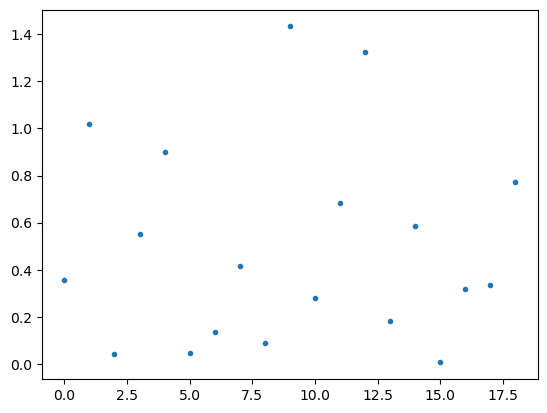

In [69]:
xg_goal_diff = output_data[np_xg] - output_data[np_xg_against]
Y = xg_goal_diff.to_numpy()
X = feature_data.to_numpy()
X_norm = (X - X.min()) / (X.max() - X.min())
Y_norm = (Y - Y.min()) / (Y.max() - Y.min())

# x_train = X_norm[:-10]
# x_test = X_norm[-10:]
# y_train = Y_norm[:-10]
# y_test = Y_norm[-10:]

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, shuffle=True)

regr = linear_model.LinearRegression()

# # Train the model using the train data
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(y_pred)
print(y_test)

plt.plot([i for i in range(len(y_test))], abs(y_test - y_pred), ".", label="regression")
y_diff = y_test - y_pred
print(y_diff.mean(), y_diff.std())

[-1.33324766 -0.34123282 -0.66895274  0.96155428  0.0565692   0.11297972
 -0.42021712 -0.47751388  0.6628851   1.34826691 -0.21121826  0.30542518
 -0.031925    0.65174451  0.1315692   0.47217278 -0.20612427  0.24138878
 -0.58504735]
[-1.77428479  0.6806984  -0.8909188   0.73154836  0.9778746   0.0342342
 -0.5853065   0.123213    0.92472816 -0.21251725  0.0696806  -0.17461537
  1.19874714  1.02046605 -0.40882283  0.546231    0.1178775   0.0495215
  0.1337877 ]


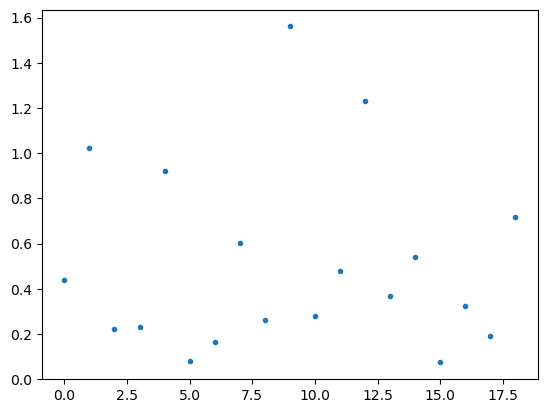

In [70]:
regr = linear_model.Lasso(alpha=0.1)

# # Train the model using the train data
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

print(y_pred)
print(y_test)

plt.ylim(0, 2)
plt.plot([i for i in range(len(y_test))], abs(y_test - y_pred), ".", label="regression")